In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt


2023-01-21 20:46:25.612572: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-21 20:46:25.612640: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Dataset/train'
valid_path = 'Dataset/test'

In [3]:
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

2023-01-21 20:47:49.484432: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-01-21 20:47:49.582406: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-21 20:47:49.583012: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1050 Ti computeCapability: 6.1
coreClock: 1.62GHz coreCount: 6 deviceMemorySize: 3.95GiB deviceMemoryBandwidth: 104.43GiB/s
2023-01-21 20:47:49.583308: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-21 20:47:49.583561: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic libr

In [4]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [5]:
# useful for getting number of output classes
folders = glob('/Datascience/Dataset/train/*')

In [7]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)


In [9]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/Data Science/Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2266 images belonging to 2 classes.


In [14]:
test_set = test_datagen.flow_from_directory('/Data Science/Dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 400 images belonging to 2 classes.


In [15]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

2023-01-21 20:51:54.657557: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-01-21 20:51:54.675729: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2199995000 Hz


Epoch 1/20


2023-01-21 20:51:56.991586: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 102760448 exceeds 10% of free system memory.
2023-01-21 20:51:57.078425: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 102760448 exceeds 10% of free system memory.
2023-01-21 20:51:57.118392: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 106463232 exceeds 10% of free system memory.
2023-01-21 20:51:57.140647: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 25690112 exceeds 10% of free system memory.
2023-01-21 20:51:57.157888: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 25690112 exceeds 10% of free system memory.


71/71 [==============================] - 122s 2s/step - loss: 1.0837 - accuracy: 0.7127 - val_loss: 0.1042 - val_accuracy: 0.9650
Epoch 2/20
71/71 [==============================] - 119s 2s/step - loss: 0.2204 - accuracy: 0.9131 - val_loss: 0.1074 - val_accuracy: 0.9650
Epoch 3/20
71/71 [==============================] - 119s 2s/step - loss: 0.2273 - accuracy: 0.9051 - val_loss: 0.0589 - val_accuracy: 0.9825
Epoch 4/20
71/71 [==============================] - 122s 2s/step - loss: 0.1609 - accuracy: 0.9404 - val_loss: 0.0634 - val_accuracy: 0.9775
Epoch 5/20
71/71 [==============================] - 125s 2s/step - loss: 0.1083 - accuracy: 0.9647 - val_loss: 0.0904 - val_accuracy: 0.9700
Epoch 6/20
71/71 [==============================] - 129s 2s/step - loss: 0.1335 - accuracy: 0.9541 - val_loss: 0.0475 - val_accuracy: 0.9825
Epoch 7/20
71/71 [==============================] - 128s 2s/step - loss: 0.0956 - accuracy: 0.9687 - val_loss: 0.1643 - val_accuracy: 0.9350
Epoch 8/20
71/71 [======

In [16]:
import matplotlib.pyplot as plt

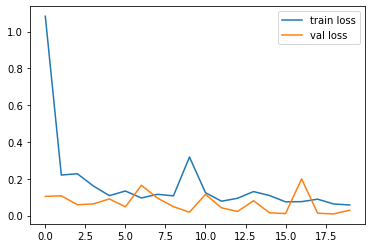

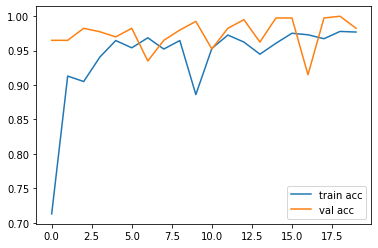

<Figure size 432x288 with 0 Axes>

In [17]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('heart_disease_prediction_model_resnet50.h5')
